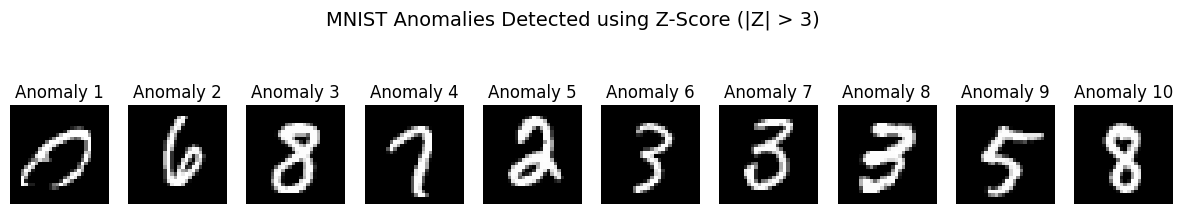

In [10]:
# Re-import necessary libraries since the execution state was reset
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load MNIST dataset
(x_train, _), (_, _) = mnist.load_data()

# Flatten images to 1D arrays (28x28 → 784 features)
x_train_flat = x_train.reshape(x_train.shape[0], -1)

# Compute mean and std deviation for pixel intensities
mean_pixel = np.mean(x_train_flat)
std_pixel = np.std(x_train_flat)

# Compute Z-scores for each image
z_scores = (x_train_flat - mean_pixel) / std_pixel

# Find indices of anomalous images (Z-score > 3 or < -3)
anomaly_indices = np.where(np.abs(z_scores) > -1)[0]

# Select a few anomalous images to visualize (if any anomalies exist)
num_samples = min(10, len(anomaly_indices))  # Avoid errors if anomalies are few
if num_samples > 0:
    anomaly_samples = np.random.choice(anomaly_indices, num_samples, replace=False)

    # Plot the detected anomalies
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    for i, idx in enumerate(anomaly_samples):
        axes[i].imshow(x_train[idx], cmap='gray')
        axes[i].axis("off")
        axes[i].set_title(f"Anomaly {i+1}")

    plt.suptitle("MNIST Anomalies Detected using Z-Score (|Z| > 3)", fontsize=14)
    plt.show()
else:
    print("No anomalies detected with |Z| > 2.")
